Результаты теста Дики-Фуллера (без константы и тренда):
ADF статистика: -0.7029269122482426
p-значение: 0.4113769671960867

Результаты теста Дики-Фуллера (с константой, без тренда):
ADF статистика: -1.4515431034941433
p-значение: 0.557331767203846

Результаты теста Дики-Фуллера (с константой и линейным трендом):
ADF статистика: -1.9134848102045108
p-значение: 0.6476528880466672


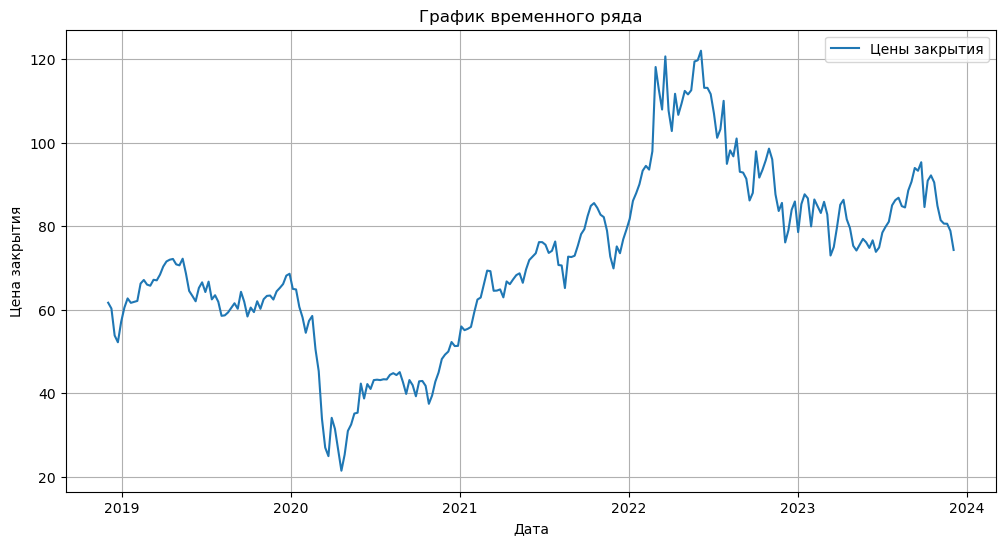

In [50]:
## ЗАДАЧА 1. Проверить на стационарность ряд цены на нефть
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Используем данные https://finance.yahoo.com/, берем для удобства недельную частоту, загрузка в файл Excel.
file_path = r'D:\neft.xlsx'
df = pd.read_excel(file_path)
date_column_name = 'Date'
close_column_name = 'Close'

# Преобразование столбца 'Date' в формат даты (с учетом нового формата даты)
df[date_column_name] = pd.to_datetime(df[date_column_name], format='%b %d, %Y')

# Установка столбца 'Date' в качестве индекса
df.set_index(date_column_name, inplace=True)

# Замена запятых на точки и преобразование столбца 'Close'
df['Close'] = df['Close'].str.replace(',', '.').astype(float)

# Удаление строк с "inf" или "NaN" значениями в столбце 'Close'
df = df[~df['Close'].isin([np.inf, -np.inf, np.nan])]

# Проведение теста Дики-Фуллера на столбце с ценами закрытия
result_no_constant_no_trend = adfuller(df[close_column_name], regression='n')
result_constant_no_trend = adfuller(df[close_column_name], regression='c')
result_constant_linear_trend = adfuller(df[close_column_name], regression='ct')

# Вывод результатов теста
print("Результаты теста Дики-Фуллера (без константы и тренда):")
print(f'ADF статистика: {result_no_constant_no_trend[0]}')
print(f'p-значение: {result_no_constant_no_trend[1]}')

print("\nРезультаты теста Дики-Фуллера (с константой, без тренда):")
print(f'ADF статистика: {result_constant_no_trend[0]}')
print(f'p-значение: {result_constant_no_trend[1]}')

print("\nРезультаты теста Дики-Фуллера (с константой и линейным трендом):")
print(f'ADF статистика: {result_constant_linear_trend[0]}')
print(f'p-значение: {result_constant_linear_trend[1]}')

# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[close_column_name], label='Цены закрытия')
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()


Исходя из результатов теста Дики-Фуллера, можно сделать следующий вывод:
- Ряд цены на нефть с константой и линейным трендом имеет ADF статистику равную -1.9135 и p-значение равное 0.6477. Так как p-значение больше 0.05, ряд не является стационарным на уровне значимости 0.05.
- Ряд цены на нефть с константой, но без тренда, имеет ADF статистику равную -1.4515 и p-значение равное 0.5573. Так как p-значение также больше 0.05, этот ряд также не является стационарным на уровне значимости 0.05.
- Ряд цены на нефть без константы и тренда имеет ADF статистику равную -0.7029 и p-значение равное 0.4114. В данном случае p-значение также превышает 0.05, поэтому и этот ряд не считается стационарным на уровне значимости 0.05.

Таким образом, ни одна из рассмотренных моделей не дает оснований считать ряд цены на нефть стационарным на уровне значимости 0.05.

Результаты теста Дики-Фуллера (без константы и тренда):
ADF статистика: -0.7029269122482426
p-значение: 0.4113769671960867
Ряд без константы и тренда не является стационарным (p-значение > 0.05)

Результаты теста Дики-Фуллера (с константой, без тренда):
ADF статистика: -1.4515431034941433
p-значение: 0.557331767203846
Ряд с константой, без тренда, не является стационарным (p-значение > 0.05)

Результаты теста Дики-Фуллера (с константой и линейным трендом):
ADF статистика: -1.9134848102045108
p-значение: 0.6476528880466672
Ряд с константой и линейным трендом не является стационарным (p-значение > 0.05)


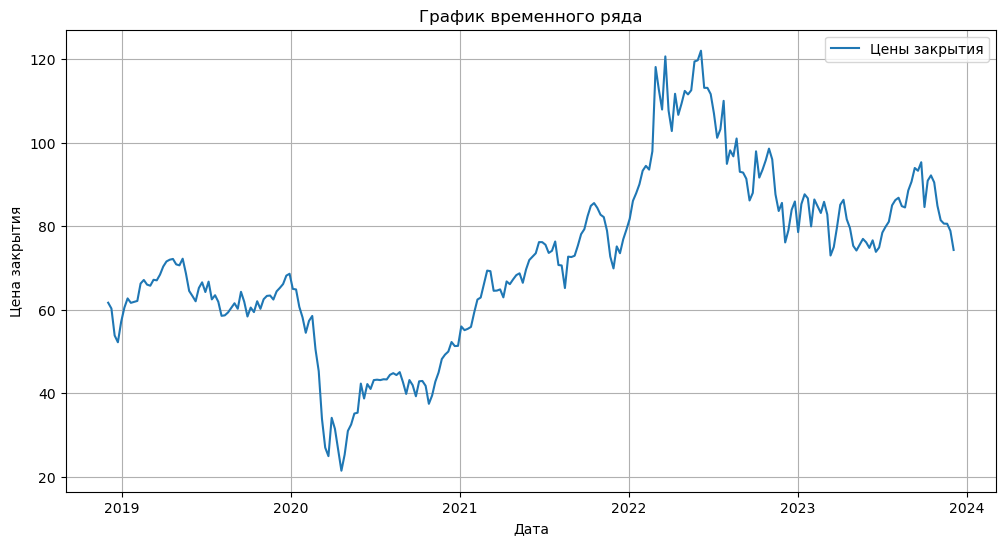

In [54]:
## ЗАДАЧА 2. Проверить на стационарность ряд из лог-приростов цены на нефть
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Используем данные https://finance.yahoo.com/, берем для удобства недельную частоту, загрузка в файл Excel.
file_path = r'D:\neft.xlsx'
df = pd.read_excel(file_path)
date_column_name = 'Date'
close_column_name = 'Close'

# Преобразование столбца 'Date' в формат даты (с учетом нового формата даты)
df[date_column_name] = pd.to_datetime(df[date_column_name], format='%b %d, %Y')

# Установка столбца 'Date' в качестве индекса
df.set_index(date_column_name, inplace=True)

# Замена запятых на точки и преобразование столбца 'Close'
df['Close'] = df['Close'].str.replace(',', '.').astype(float)

# Удаление строк с "inf" или "NaN" значениями в столбце 'Close'
df = df[~df['Close'].isin([np.inf, -np.inf, np.nan])]

# Проведение теста Дики-Фуллера на столбце с ценами закрытия
result_no_constant_no_trend = adfuller(df[close_column_name], regression='n')
result_constant_no_trend = adfuller(df[close_column_name], regression='c')
result_constant_linear_trend = adfuller(df[close_column_name], regression='ct')

# Вывод результатов теста
print("Результаты теста Дики-Фуллера (без константы и тренда):")
print(f'ADF статистика: {result_no_constant_no_trend[0]}')
print(f'p-значение: {result_no_constant_no_trend[1]}')
if result_no_constant_no_trend[1] <= 0.05:
    print("Ряд без константы и тренда является стационарным (p-значение <= 0.05)")
else:
    print("Ряд без константы и тренда не является стационарным (p-значение > 0.05)")

print("\nРезультаты теста Дики-Фуллера (с константой, без тренда):")
print(f'ADF статистика: {result_constant_no_trend[0]}')
print(f'p-значение: {result_constant_no_trend[1]}')
if result_constant_no_trend[1] <= 0.05:
    print("Ряд с константой, без тренда, является стационарным (p-значение <= 0.05)")
else:
    print("Ряд с константой, без тренда, не является стационарным (p-значение > 0.05)")

print("\nРезультаты теста Дики-Фуллера (с константой и линейным трендом):")
print(f'ADF статистика: {result_constant_linear_trend[0]}')
print(f'p-значение: {result_constant_linear_trend[1]}')
if result_constant_linear_trend[1] <= 0.05:
    print("Ряд с константой и линейным трендом является стационарным (p-значение <= 0.05)")
else:
    print("Ряд с константой и линейным трендом не является стационарным (p-значение > 0.05)")

# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[close_column_name], label='Цены закрытия')
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()



Все три версии теста не подтверждают стационарность ряда на уровне значимости 0.05.


Значения параметров:
const        23.201802
Oil_Price     0.734689
dtype: float64

Стандартные ошибки:
const        18.203023
Oil_Price     0.220236
dtype: float64

Верхний интервал доверия:
const        59.745896
Oil_Price     1.176830
Name: 1, dtype: float64

Нижний интервал доверия:
const       -13.342292
Oil_Price     0.292548
Name: 0, dtype: float64

Значения p-value:
const        0.208223
Oil_Price    0.001591
dtype: float64

Среднеквадратическая ошибка (MSE): 80.86841415074375

Тест Дики-Фуллера:
ADF Statistic: -2.1864514394782
p-value: 0.21119949917682201
Critical Values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}


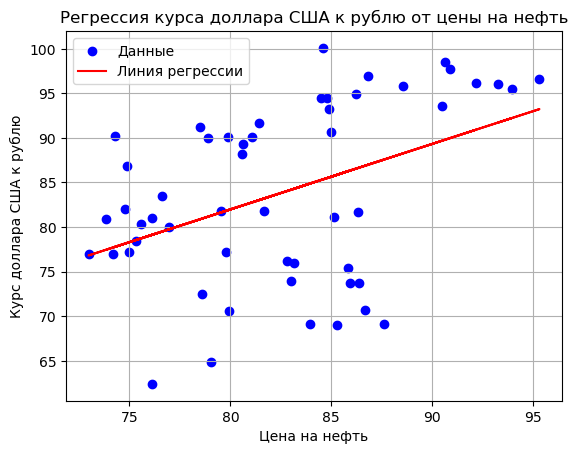

In [41]:
##ЗАДАЧА 3. Построить линейную регрессию курса доллара США к рублю к цене на нефть и проверить значимость параметров.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Загрузка данных
file_path_usd = r'D:\RUB=X.csv'  # Путь к файлу с данными о курсе доллара
file_path_oil = r'D:\LOG.xlsx'   # Путь к файлу с данными о цене на нефть в формате Excel

# Загрузка данных в DataFrame
df_usd = pd.read_csv(file_path_usd)
df_oil = pd.read_excel(file_path_oil)

# Преобразование столбца 'Date' к типу datetime
df_usd['Date'] = pd.to_datetime(df_usd['Date'])
df_oil['Date'] = pd.to_datetime(df_oil['Date'])

# Установка столбца 'Date' в качестве индекса
df_usd.set_index('Date', inplace=True)
df_oil.set_index('Date', inplace=True)

# Объединение данных по дате
merged_data = pd.concat([df_usd['Close'], df_oil['Close*']], axis=1, join='inner')

# Переименование столбцов для удобства
merged_data.columns = ['USD_RUB', 'Oil_Price']

# Определение зависимой и независимой переменных
X = merged_data['Oil_Price'].astype(float)  # Цена на нефть - независимая переменная
y = merged_data['USD_RUB'].astype(float)     # Курс доллара США к рублю - зависимая переменная

# Добавление константы к независимой переменной (intercept)
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Извлечение значений параметров и других статистических данных
parameter_values = model.params  # Значения параметров
std_errors = model.bse  # Стандартные ошибки
upper_confidence_interval = model.conf_int().iloc[:, 1]  # Верхний интервал доверия
lower_confidence_interval = model.conf_int().iloc[:, 0]  # Нижний интервал доверия
p_values = model.pvalues  # Значения p-value

# Вычисление прогнозных значений
predicted_values = model.predict(X)

# Вычисление MSE
mse = mean_squared_error(y, predicted_values)

# Вывод данных
print("\nЗначения параметров:")
print(parameter_values)

print("\nСтандартные ошибки:")
print(std_errors)

print("\nВерхний интервал доверия:")
print(upper_confidence_interval)

print("\nНижний интервал доверия:")
print(lower_confidence_interval)

print("\nЗначения p-value:")
print(p_values)

print(f"\nСреднеквадратическая ошибка (MSE): {mse}")

# Тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print("\nТест Дики-Фуллера:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Построение графика рассеяния и линии регрессии
plt.scatter(X['Oil_Price'], y, label='Данные', color='b')  # График рассеяния
plt.plot(X['Oil_Price'], predicted_values, label='Линия регрессии', color='r')  # Линия регрессии
plt.xlabel('Цена на нефть')
plt.ylabel('Курс доллара США к рублю')
plt.legend()
plt.title('Регрессия курса доллара США к рублю от цены на нефть')
plt.grid(True)
plt.show()

from scipy.stats import pearsonr



В задаче 3 исследована зависимость между курсом доллара США и ценой на нефть с использованием линейной регрессии. Результаты анализа модели показывают, что коэффициент при константе составил около 23.20, что означает начальное значение курса доллара при нулевой цене на нефть. Коэффициент перед ценой на нефть составил около 0.73, что указывает на положительную связь между ценой на нефть и курсом доллара.

Стандартные ошибки параметров составили около 18.20 для константы и около 0.22 для коэффициента перед ценой на нефть. Эти значения показывают точность оценок параметров. Доверительные интервалы для константы и коэффициента также предоставлены, позволяя оценить диапазон возможных значений с уровнем доверия 95%.

Значения p-value для константы и коэффициента составили соответственно около 0.21 и 0.0016. P-value для коэффициента намного меньше уровня значимости 0.05, что говорит о статистической значимости связи цены на нефть и курса доллара. Однако, p-value для константы выше уровня значимости.

Среднеквадратическая ошибка (MSE) модели составила около 80.87, что является мерой точности модели в прогнозировании курса доллара.

Тест Дики-Фуллера был проведен для оценки стационарности временного ряда курса доллара. Значение ADF-статистики составило около -2.19, а p-value – около 0.2112. P-value превышает уровень значимости 0.05, что может указывать на нестационарность временного ряда.

In [46]:
##ЗАДАНИЕ 5. Исследовать автокорреляцию лог-приростов цены на нефть.
from scipy.stats import pearsonr

correlation, p_value = pearsonr(column_log_return, price_log_return)
print(f'Автокорреляция лог-приростов {column} и лог-приростов цены на нефть:')
print(f'Корреляция Пирсона: {correlation:.4f}')
print(f'p-значение: {p_value:.4f}')
print()

Автокорреляция лог-приростов USD_RUB и лог-приростов цены на нефть:
Корреляция Пирсона: 0.0186
p-значение: 0.8959



Полученные значения корреляции и p-значения указывают на то, что нет статистически значимой корреляции между этими двумя переменными, так как p-значение (0.8959) больше обычно используемого уровня значимости 0.05.


Значения параметров:
const            1.408101
Log_Oil_Price    0.683216
dtype: float64

Стандартные ошибки:
const            0.996768
Log_Oil_Price    0.226004
dtype: float64

Верхний интервал доверия:
const            3.409196
Log_Oil_Price    1.136939
Name: 1, dtype: float64

Нижний интервал доверия:
const           -0.592994
Log_Oil_Price    0.229494
Name: 0, dtype: float64

Значения p-value:
const            0.163828
Log_Oil_Price    0.003910
dtype: float64

Среднеквадратическая ошибка (MSE): 0.012403997763759764

Тест Дики-Фуллера:
ADF Statistic: -2.5344836112746094
p-value: 0.10730790642050858
Critical Values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}


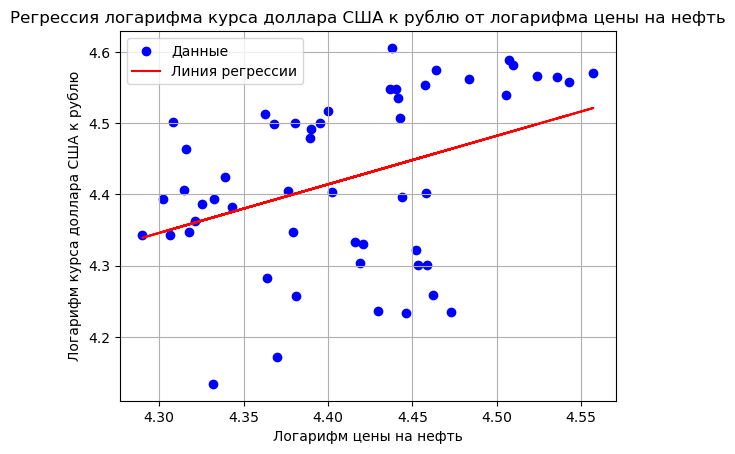

In [28]:
##ЗАДАЧА 4. Построить линейную регрессию логарифма курса доллара США к рублю к логарифму цены на нефть и проверить значимость параметров.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Загрузка данных
file_path_usd = r'D:\RUB=X.csv'  # Путь к файлу с данными о курсе доллара
file_path_oil = r'D:\LOG.xlsx'   # Путь к файлу с данными о цене на нефть в формате Excel

# Загрузка данных в DataFrame
df_usd = pd.read_csv(file_path_usd)
df_oil = pd.read_excel(file_path_oil)

# Преобразование столбца 'Date' к типу datetime
df_usd['Date'] = pd.to_datetime(df_usd['Date'])
df_oil['Date'] = pd.to_datetime(df_oil['Date'])

# Установка столбца 'Date' в качестве индекса
df_usd.set_index('Date', inplace=True)
df_oil.set_index('Date', inplace=True)

# Объединение данных по дате
merged_data = pd.concat([df_usd['Close'], df_oil['Close*']], axis=1, join='inner')

# Переименование столбцов для удобства
merged_data.columns = ['USD_RUB', 'Oil_Price']

# Преобразование данных в логарифмическую шкалу
merged_data['Log_USD_RUB'] = np.log(merged_data['USD_RUB'])
merged_data['Log_Oil_Price'] = np.log(merged_data['Oil_Price'].str.replace(',', '.').astype(float))

# Определение зависимой и независимой переменных
X = merged_data['Log_Oil_Price']  # Логарифм цены на нефть - независимая переменная
y = merged_data['Log_USD_RUB']     # Логарифм курса доллара США к рублю - зависимая переменная

# Добавление константы к независимой переменной (intercept)
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Извлечение значений параметров и других статистических данных
parameter_values = model.params  # Значения параметров
std_errors = model.bse  # Стандартные ошибки
upper_confidence_interval = model.conf_int().iloc[:, 1]  # Верхний интервал доверия
lower_confidence_interval = model.conf_int().iloc[:, 0]  # Нижний интервал доверия
p_values = model.pvalues  # Значения p-value

# Вычисление прогнозных значений
predicted_values = model.predict(X)

# Вычисление MSE
mse = mean_squared_error(y, predicted_values)

# Вывод данных
print("\nЗначения параметров:")
print(parameter_values)

print("\nСтандартные ошибки:")
print(std_errors)

print("\nВерхний интервал доверия:")
print(upper_confidence_interval)

print("\nНижний интервал доверия:")
print(lower_confidence_interval)

print("\nЗначения p-value:")
print(p_values)

print(f"\nСреднеквадратическая ошибка (MSE): {mse}")

# Тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print("\nТест Дики-Фуллера:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Построение графика рассеяния и линии регрессии
plt.scatter(X['Log_Oil_Price'], y, label='Данные', color='b')  # График рассеяния
plt.plot(X['Log_Oil_Price'], predicted_values, label='Линия регрессии', color='r')  # Линия регрессии
plt.xlabel('Логарифм цены на нефть')
plt.ylabel('Логарифм курса доллара США к рублю')
plt.legend()
plt.title('Регрессия логарифма курса доллара США к рублю от логарифма цены на нефть')
plt.grid(True)
plt.show()


В задаче 4 была проведена линейная регрессионная анализ зависимости между логарифмом курса доллара США к рублю и логарифмом цены на нефть. Результаты анализа показывают, что коэффициент при константе составил около 1.408101, а коэффициент перед логарифмом цены на нефть составил около 0.683216. Эти значения позволяют построить уравнение регрессии, которое описывает зависимость между этими двумя переменными.

Стандартные ошибки параметров составили около 0.996768 для константы и около 0.226004 для коэффициента перед логарифмом цены на нефть. Эти значения являются мерой точности оценок параметров. Меньшие значения стандартных ошибок указывают на более точные оценки параметров.

Доверительные интервалы для константы и коэффициента также предоставлены. Верхний интервал доверия для константы составил 3.409196, а верхний интервал доверия для коэффициента - 1.136939. Нижний интервал доверия для константы равен -0.592994, а для коэффициента - 0.229494. Эти интервалы позволяют оценить диапазон возможных значений параметров с уровнем доверия 95%.

Значения p-value для константы и коэффициента составили соответственно около 0.163828 и 0.003910. P-value используются для проверки статистической значимости параметров. Маленькие значения p-value (обычно менее 0.05) указывают на статистическую значимость параметров. В данном случае, коэффициент перед логарифмом цены на нефть имеет маленькое значение p-value, что указывает на его статистическую значимость.

Среднеквадратическая ошибка (MSE) модели составила около 0.0124, что является мерой точности модели в прогнозировании курса доллара. Это довольно низкое значение, что указывает хорошее качество модели

Тест Дики-Фуллера был проведен для оценки стационарности временного ряда курса доллара. Значение ADF-статистики составило около -2.5345, а p-value – около 0.1073. P-value превышает уровень значимости 0.05, что может указывать на нестационарность временного ряда.